Считаем файлы из дериктории и созданим датафрем из книга - предложение

In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = glob.glob('/home/pavel/Рабочий стол/учеба/NLP/*.txt')
d = list()
for book_file in books :
    with open(book_file, encoding='utf-8') as f :
        book = os.path.basename(book_file.split('.')[0])
        d.append(pd.DataFrame({'book': book, 'lines': f.readlines()}))
doc = pd.concat(d)
doc.head()

,book,lines
0,Метрики качества,\n
1,Метрики качества,\n
2,Метрики качества,"Мы начинаем урок, посвященный метрикам качеств..."
3,Метрики качества,\n
4,Метрики качества,"В этом видео мы начнем разговор о том, как мо..."


очистим текст от знаков пунктуации, приведем все буквы в нижний регистр, а также заменим "\n" на ""

In [2]:
import string
def remove_punctuation_and_normalize(text):
    no_punct = "".join([c.replace("\n","") for c in text if c not in string.punctuation])
    no_punct_and_normalize = no_punct.lower()
    return no_punct_and_normalize

In [3]:
doc.lines = doc.lines.apply(lambda x: remove_punctuation_and_normalize(x))
doc.head()

,book,lines
0,Метрики качества,
1,Метрики качества,
2,Метрики качества,мы начинаем урок посвященный метрикам качества...
3,Метрики качества,
4,Метрики качества,в этом видео мы начнем разговор о том как мож...


удалим пустые строки из датафрейма

In [4]:
doc = doc[doc.lines.str.len() > 0]
doc.head()

,book,lines
2,Метрики качества,мы начинаем урок посвященный метрикам качества...
4,Метрики качества,в этом видео мы начнем разговор о том как мож...
6,Метрики качества,в этом видео мы поговорим о точности и полноте...
8,Метрики качества,в этом видео мы поговорим о том как объединит...
10,Метрики качества,в этом видео мы поговорим о том как измерять ...


токинизируем получившиеся предоложения в doc["lines"] и запишим результат в новую колонку "words"

In [5]:
import nltk
tokenizer = nltk.RegexpTokenizer(r'\w+')
doc['words'] = doc['lines'].apply(lambda x: tokenizer.tokenize(x))
doc

,book,lines,words
2,Метрики качества,мы начинаем урок посвященный метрикам качества...,"[мы, начинаем, урок, посвященный, метрикам, ка..."
4,Метрики качества,в этом видео мы начнем разговор о том как мож...,"[в, этом, видео, мы, начнем, разговор, о, том,..."
6,Метрики качества,в этом видео мы поговорим о точности и полноте...,"[в, этом, видео, мы, поговорим, о, точности, и..."
8,Метрики качества,в этом видео мы поговорим о том как объединит...,"[в, этом, видео, мы, поговорим, о, том, как, о..."
10,Метрики качества,в этом видео мы поговорим о том как измерять ...,"[в, этом, видео, мы, поговорим, о, том, как, и..."
12,Метрики качества,метрики качества,"[метрики, качества]"
13,Метрики качества,41 метрики качества в задачах регрессии,"[41, метрики, качества, в, задачах, регрессии]"
14,Метрики качества,411 применение метрик качества в машинном обуч...,"[411, применение, метрик, качества, в, машинно..."
15,Метрики качества,метрики качества могут использоваться,"[метрики, качества, могут, использоваться]"
16,Метрики качества,• для задания функционала ошибки используется ...,"[для, задания, функционала, ошибки, использует..."


почистим колонку "words" от предлогов, числительныx, местоимений, чисел, а также от мусора в виде кусков символов от формул  

In [6]:
from nltk.corpus import stopwords
import re
stop_words = stopwords.words('russian')
#print(stop_words)
def remove_stopwords(text):
    stop_words = stopwords.words('russian')
    #добавим к уже существующим всречающиеся в тексте, но не учтенные в списке слова
    stop_words.extend(['это', 'так', 'вот', 'быть', '—', 'к', 'эта',
                       'который', 'которой', 'рис'])
    reg = re.compile('[^А-я]')
    words_pre = [reg.sub('', w) for w in text if w not in stop_words]
    words = [x for x in words_pre if len(x) > 0]
    return words

In [7]:
doc.words = doc.words.apply(lambda x: remove_stopwords(x))
doc = doc[doc.words.str.len() > 0]
doc

,book,lines,words
2,Метрики качества,мы начинаем урок посвященный метрикам качества...,"[начинаем, урок, посвященный, метрикам, качест..."
4,Метрики качества,в этом видео мы начнем разговор о том как мож...,"[видео, начнем, разговор, измерять, качество, ..."
6,Метрики качества,в этом видео мы поговорим о точности и полноте...,"[видео, поговорим, точности, полноте, метриках..."
8,Метрики качества,в этом видео мы поговорим о том как объединит...,"[видео, поговорим, объединить, точность, полно..."
10,Метрики качества,в этом видео мы поговорим о том как измерять ...,"[видео, поговорим, измерять, качество, оценок,..."
12,Метрики качества,метрики качества,"[метрики, качества]"
13,Метрики качества,41 метрики качества в задачах регрессии,"[метрики, качества, задачах, регрессии]"
14,Метрики качества,411 применение метрик качества в машинном обуч...,"[применение, метрик, качества, машинном, обуче..."
15,Метрики качества,метрики качества могут использоваться,"[метрики, качества, могут, использоваться]"
16,Метрики качества,• для задания функционала ошибки используется ...,"[задания, функционала, ошибки, используется, о..."


следующий шаг - это привести все слова в doc['words'] привести в нормальную форму (лемматизация)

In [8]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
def words_normal_form(text):
    words = [morph.parse(x)[0].normal_form for x in text]
    return words

In [9]:
doc.words = doc.words.apply(lambda x: words_normal_form(x))
doc.words.head()

/home/pavel/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2     [начинать, урок, посвятить, метрика, качество,...
4     [видео, начать, разговор, измерять, качество, ...
6     [видео, поговорить, точность, полнота, метрика...
8     [видео, поговорить, объединить, точность, полн...
10    [видео, поговорить, измерять, качество, оценка...
Name: words, dtype: object

определим новую функцию для подсчета количества терминов на книгу

In [10]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


n_w
book                                          word            
Знакомство с машинным обучением               задача       120
                                              признак      115
                                              объект        80
                                              обучение      79
                                              который       67
Линейные модели                               градиентный   84
                                              объект        83
                                              линейный      82
                                              алгоритм      78
                                              ошибка        76
Линейные модели: статистический взгляд        регрессия     84
                                              который       65
                                              функция       59
                                              оценка        58
                                              задача        56
Метрики качества                              класс        123
                                              объект       123
                                              точность      98
                                              полнота       95
                                              алгоритм      85
Практические рекомендации по линейным моделям признак      149
                                              класс         98
                                              объект        78
                                              значение      63
                                              выборка       54
Проблема переобучения и борьба с ней          выборка      138
                                              алгоритм     123
                                              качество      75
                                              обучать       59
                                              дать          51
Решающие деревья                              дерево       167
                                              объект       126
                                              признак      105
                                              критерий      97
                                              значение      88
Случайные леса                                алгоритм     126
                                              дерево       110
                                              выборка      108
                                              обучать       90
                                              базовый       86

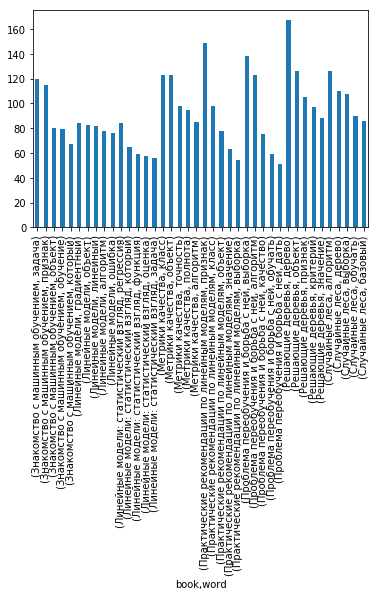

In [11]:
rows = list()
for row in doc[['book', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.book, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

counts_without_stopwords = words.groupby('book')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts_without_stopwords.head()

pretty_plot_top_n(counts_without_stopwords['n_w'])

как мы можем видеть из подсчета слов, одним из популярных слов после лемматизации является слово 'который', а это значит мы не полностью почистили датафрейм и стоит еще раз очистить его

In [12]:
doc.words = doc.words.apply(lambda x: remove_stopwords(x))
doc = doc[doc.words.str.len() > 0]


n_w
book                                          word            
Знакомство с машинным обучением               задача       120
                                              признак      115
                                              объект        80
                                              обучение      79
                                              пример        64
Линейные модели                               градиентный   84
                                              объект        83
                                              линейный      82
                                              алгоритм      78
                                              ошибка        76
Линейные модели: статистический взгляд        регрессия     84
                                              функция       59
                                              оценка        58
                                              задача        56
                                              модель        56
Метрики качества                              класс        123
                                              объект       123
                                              точность      98
                                              полнота       95
                                              алгоритм      85
Практические рекомендации по линейным моделям признак      149
                                              класс         98
                                              объект        78
                                              значение      63
                                              выборка       54
Проблема переобучения и борьба с ней          выборка      138
                                              алгоритм     123
                                              качество      75
                                              обучать       59
                                              дать          51
Решающие деревья                              дерево       167
                                              объект       126
                                              признак      105
                                              критерий      97
                                              значение      88
Случайные леса                                алгоритм     126
                                              дерево       110
                                              выборка      108
                                              обучать       90
                                              базовый       86

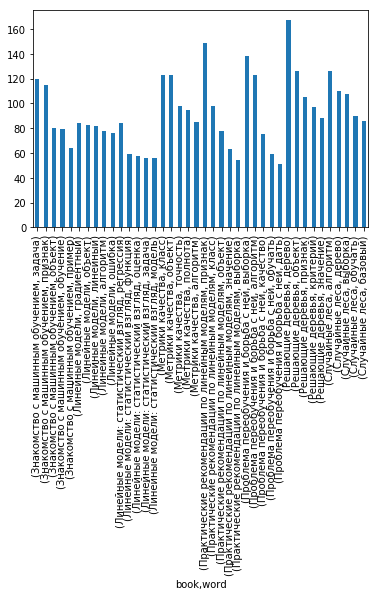

In [13]:
rows = list()
for row in doc[['book', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.book, word))

words = pd.DataFrame(rows, columns=['book', 'word'])
words.head()

counts_without_stopwords = words.groupby('book')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts_without_stopwords.head()

pretty_plot_top_n(counts_without_stopwords['n_w'])

как видим от слова 'который' мы избавелись

Следующим шагом будет подсчет TF-IDF

$$TF = \frac{n_w}{n_d}$$

Посчитаем общее число слов на документ и выведем на экран

In [17]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

,n_d
book,
Знакомство с машинным обучением,3640
Линейные модели,4682
Линейные модели: статистический взгляд,4148
Метрики качества,4326
Практические рекомендации по линейным моделям,3201
Проблема переобучения и борьба с ней,3220
Решающие деревья,4906
Случайные леса,3846


Теперь у нас есть как n_w так и n_d подсчитаем значение TF

tf
book                                          word                 
Знакомство с машинным обучением               задача       0.032967
                                              признак      0.031593
                                              объект       0.021978
                                              обучение     0.021703
                                              пример       0.017582
Линейные модели                               градиентный  0.017941
                                              объект       0.017727
                                              линейный     0.017514
                                              алгоритм     0.016660
                                              ошибка       0.016232
Линейные модели: статистический взгляд        регрессия    0.020251
                                              функция      0.014224
                                              оценка       0.013983
                                              задача       0.013500
                                              модель       0.013500
Метрики качества                              класс        0.028433
                                              объект       0.028433
                                              точность     0.022654
                                              полнота      0.021960
                                              алгоритм     0.019649
Практические рекомендации по линейным моделям признак      0.046548
                                              класс        0.030615
                                              объект       0.024367
                                              значение     0.019681
                                              выборка      0.016870
Проблема переобучения и борьба с ней          выборка      0.042857
                                              алгоритм     0.038199
                                              качество     0.023292
                                              обучать      0.018323
                                              дать         0.015839
Решающие деревья                              дерево       0.034040
                                              объект       0.025683
                                              признак      0.021402
                                              критерий     0.019772
                                              значение     0.017937
Случайные леса                                алгоритм     0.032761
                                              дерево       0.028601
                                              выборка      0.028081
                                              обучать      0.023401
                                              базовый      0.022361

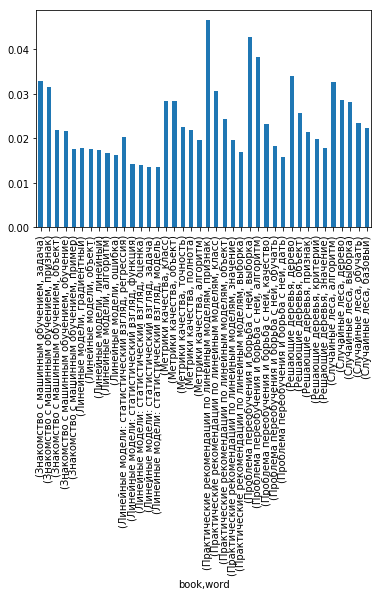

In [19]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

pretty_plot_top_n(tf['tf'])

$$IDF = \log \left( \frac{c_d}{i_d} \right)$$

Значение $${c_d}$$ нам известно (8). Значение $$i_d$$ - Количество документов, в которых встречается термин а, вычислим эти значения

In [23]:
idf = words.groupby('word')\
    .book\
    .nunique()\
    .to_frame()\
    .rename(columns={'book':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
ориентировать,1
пересечение,1
пересекаться,1
перепутываться,1
перепрыгивать,1


Вычислим значения IDF

In [24]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
ориентировать,1,2.079442
пересечение,1,2.079442
пересекаться,1,2.079442
перепутываться,1,2.079442
перепрыгивать,1,2.079442


In [25]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w   n_d        tf  i_d  idf
book                            word                                   
Знакомство с машинным обучением задача    120  3640  0.032967    8  0.0
                                признак   115  3640  0.031593    8  0.0
                                объект     80  3640  0.021978    8  0.0
                                обучение   79  3640  0.021703    8  0.0
                                пример     64  3640  0.017582    8  0.0

Вычислим TF-IDF statistic

TF-IDF термина а = (TF термина а) * (IDF термина а)

In [26]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w   n_d        tf  i_d  idf  \
book                            word                                      
Знакомство с машинным обучением задача    120  3640  0.032967    8  0.0   
                                признак   115  3640  0.031593    8  0.0   
                                объект     80  3640  0.021978    8  0.0   
                                обучение   79  3640  0.021703    8  0.0   
                                пример     64  3640  0.017582    8  0.0   

                                          tf_idf  
book                            word              
Знакомство с машинным обучением задача       0.0  
                                признак      0.0  
                                объект       0.0  
                                обучение     0.0  
                                пример       0.0

tf_idf
book                                          word                        
Знакомство с машинным обучением               фильм               0.033134
                                              пользователь        0.019043
                                              понравиться         0.017138
                                              учитель             0.011806
                                              постановка          0.007998
Линейные модели                               отступ              0.015545
                                              итерация            0.010659
                                              стохастический      0.009327
                                              спуск               0.006726
                                              гладкий             0.005626
Линейные модели: статистический взгляд        правдоподобие       0.028073
                                              вероятность         0.012059
                                              регуляризация       0.010360
                                              задолженность       0.010026
                                              отклик              0.009024
Метрики качества                              срабатывание        0.027399
                                              полнота             0.021539
                                              ложный              0.016824
                                              точность            0.015702
                                              кривая              0.010255
Практические рекомендации по линейным моделям несбалансированный  0.011693
                                              категориальный      0.010418
                                              масштабирование     0.008445
                                              кодирование         0.007146
                                              масштаб             0.007146
Проблема переобучения и борьба с ней          регуляризатор       0.012916
                                              регуляризация       0.008611
                                              многочлен           0.005812
                                              кроссвалидация      0.005166
                                              новый               0.004525
Решающие деревья                              дерево              0.033387
                                              критерий            0.027409
                                              вершина             0.023171
                                              лист                0.012998
                                              категориальный      0.009197
Случайные леса                                дерево              0.028053
                                              смещение            0.015860
                                              базовый             0.015499
                                              леса                0.014598
                                              композиция          0.013771

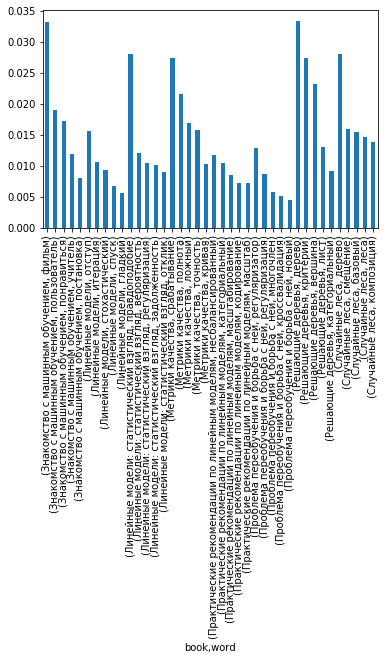

In [27]:
pretty_plot_top_n(tf_idf['tf_idf'])